In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl, plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [4]:
#import dados
import yfinance as yf

df_analise = yf.download("AAPL",
                        start="2022-01-01",
                        end="2023-01-01")["Adj Close"]
df_analise = pd.DataFrame(df_analise)
df_analise

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-01-03,180.434296
2022-01-04,178.144287
2022-01-05,173.405685
2022-01-06,170.510956
2022-01-07,170.679474
...,...
2022-12-23,131.477127
2022-12-27,129.652435
2022-12-28,125.674019


In [5]:
df_analise['returns'] = df_analise['Adj Close'].pct_change()

In [6]:
#df_analise.set_index('time', inplace=True)
df_analise['Sma_7'] = ta.sma(df_analise['Adj Close'], length=7)
df_analise['Sma_21'] = ta.sma(df_analise['Adj Close'], length=21)
df_analise['Sma_50'] = ta.sma(df_analise['Adj Close'], length=50)

df_analise['Sma_7_return'] = ta.sma(df_analise['returns'], length=7)
df_analise['Sma_21_return'] = ta.sma(df_analise['returns'], length=21)
df_analise['Sma_50_return'] = ta.sma(df_analise['returns'], length=50)

df_analise

,Adj Close,returns,Sma_7,Sma_21,Sma_50,Sma_7_return,Sma_21_return,Sma_50_return
Date,,,,,,,,
2022-01-03,180.434296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,178.144287,-0.012692,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,173.405685,-0.026600,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,170.510956,-0.016693,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,170.679474,0.000988,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,131.477127,-0.002798,133.214918,140.606253,143.640676,-0.011519,-0.006254,-0.001253
2022-12-27,129.652435,-0.013878,132.293315,139.747800,143.478731,-0.006808,-0.005982,-0.000886
2022-12-28,125.674019,-0.030685,131.086828,138.884599,143.156984,-0.009109,-0.006192,-0.002082


In [7]:
df_analise.dropna(inplace=True)

In [8]:
#inicialmente teste com Sma
df_analise['Dist_7'] = df_analise['Adj Close']-df_analise['Sma_7'] 
df_analise['Dist_21'] = df_analise['Adj Close']-df_analise['Sma_21']
df_analise['Dist_50'] = df_analise['Adj Close']-df_analise['Sma_50']

df_analise['Dist_7_return'] = df_analise['returns']-df_analise['Sma_7_return'] 
df_analise['Dist_21_return'] = df_analise['returns']-df_analise['Sma_21_return']
df_analise['Dist_50_return'] = df_analise['returns']-df_analise['Sma_50_return']
df_analise

,Adj Close,returns,Sma_7,Sma_21,Sma_50,Sma_7_return,Sma_21_return,Sma_50_return,Dist_7,Dist_21,Dist_50,Dist_7_return,Dist_21_return,Dist_50_return
Date,,,,,,,,,,,,,,
2022-03-16,158.409958,0.029015,155.830606,161.464826,165.857143,0.000622,-0.002478,-0.002411,2.579352,-3.054868,-7.447185,0.028393,0.031494,0.031427
2022-03-17,159.432327,0.006454,156.281529,160.889587,165.482904,0.003212,-0.003273,-0.002028,3.150798,-1.457259,-6.050576,0.003242,0.009727,0.008482
2022-03-18,162.767487,0.020919,156.427580,160.484508,165.270140,0.001201,-0.002211,-0.001078,6.339907,2.282979,-2.502653,0.019718,0.023130,0.021997
2022-03-21,164.157150,0.008538,157.400332,160.319073,165.143064,0.006305,-0.000792,-0.000573,6.756818,3.838077,-0.985913,0.002233,0.009330,0.009111
2022-03-22,167.571732,0.020801,159.398309,160.390920,165.080909,0.012692,0.000644,-0.000177,8.173423,7.180812,2.490823,0.008109,0.020156,0.020978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.477127,-0.002798,133.214918,140.606253,143.640676,-0.011519,-0.006254,-0.001253,-1.737791,-9.129126,-12.163549,0.008721,0.003456,-0.001545
2022-12-27,129.652435,-0.013878,132.293315,139.747800,143.478731,-0.006808,-0.005982,-0.000886,-2.640880,-10.095365,-13.826295,-0.007070,-0.007897,-0.012993
2022-12-28,125.674019,-0.030685,131.086828,138.884599,143.156984,-0.009109,-0.006192,-0.002082,-5.412809,-13.210580,-17.482966,-0.021576,-0.024493,-0.028603


In [9]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

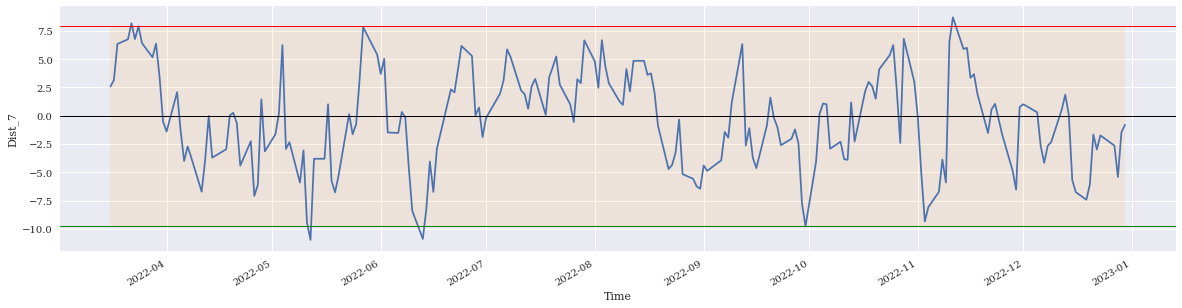

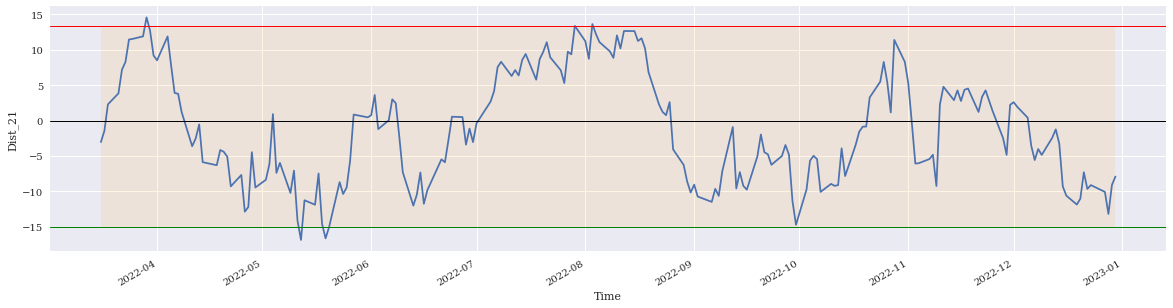

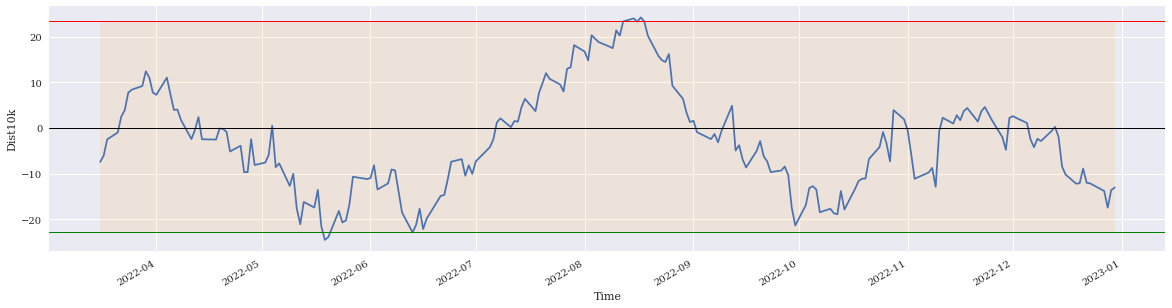

In [12]:
plt.rcParams['figure.figsize'] = (20,5)

per_dist1k = percentil(df_analise['Dist_7'], up=99, down=1)
ax = df_analise['Dist_7'].plot()
ax.fill_between(df_analise.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_7')
plt.show()

per_dist5k = percentil(df_analise['Dist_21'], up=99, down=1)
ax = df_analise['Dist_21'].plot()
ax.fill_between(df_analise.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_21')
plt.show()

per_dist10k = percentil(df_analise['Dist_50'], up=99, down=1)
ax = df_analise['Dist_50'].plot()
ax.fill_between(df_analise.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist10k')
plt.show()

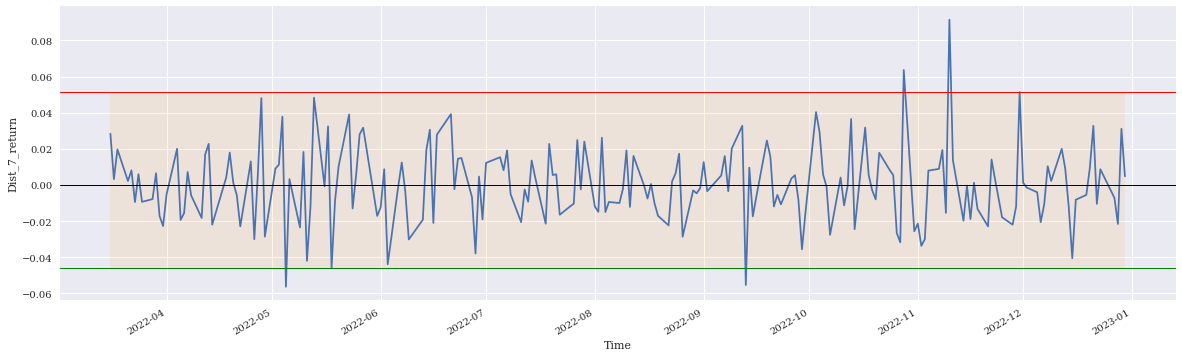

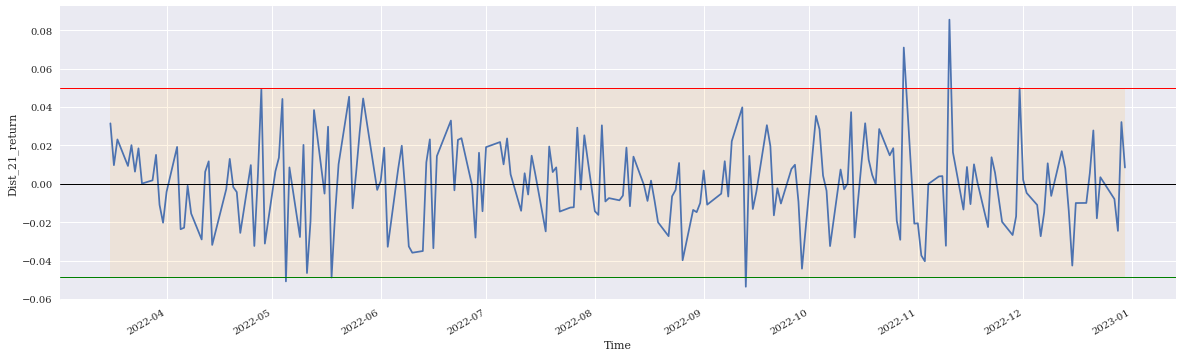

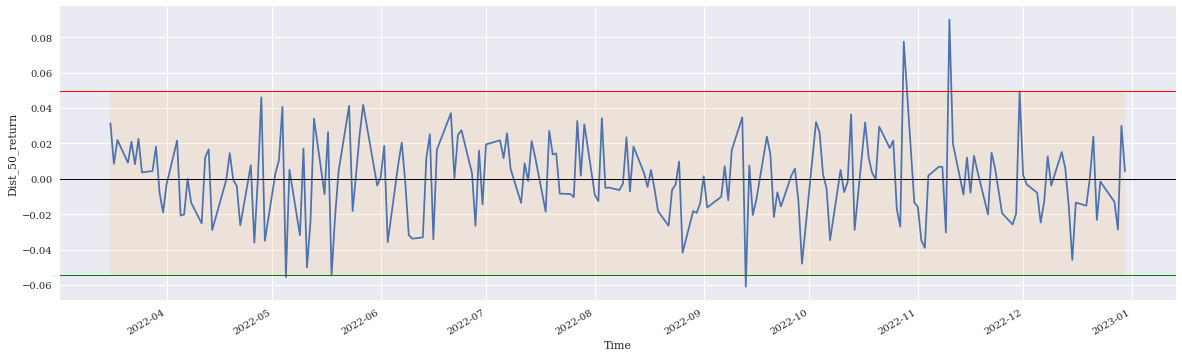

In [11]:
plt.rcParams['figure.figsize'] = (20,6)

per_dist1k = percentil(df_analise['Dist_7_return'], up=99, down=1)
ax = df_analise['Dist_7_return'].plot()
ax.fill_between(df_analise.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_7_return')
plt.show()

per_dist5k = percentil(df_analise['Dist_21_return'], up=99, down=1)
ax = df_analise['Dist_21_return'].plot()
ax.fill_between(df_analise.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_21_return')
plt.show()

per_dist10k = percentil(df_analise['Dist_50_return'], up=99, down=1)
ax = df_analise['Dist_50_return'].plot()
ax.fill_between(df_analise.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_50_return')
plt.show()